# Preparación de datos

In [1]:
import Datos

dataset_heart = Datos.Datos('Datasets/heart.csv')
dataset_wdbc = Datos.Datos('Datasets/wdbc.csv')
dataset_iris = Datos.Datos('Datasets/iris.csv')

dataset_heart_norm = Datos.Datos('Datasets/heart.csv')
dataset_wdbc_norm = Datos.Datos('Datasets/wdbc.csv')
dataset_iris_norm = Datos.Datos('Datasets/iris.csv')

heart_data = dataset_heart.datos
wdbc_data = dataset_wdbc.datos
iris_data = dataset_iris.datos

dataset_heart_norm.datos, _, _ = Datos.estandarizarDatos(dataset_heart_norm.datos, dataset_heart_norm.nominalAtributos, dataset_heart_norm.diccionarios)
dataset_wdbc_norm.datos, _, _ = Datos.estandarizarDatos(dataset_wdbc_norm.datos, dataset_wdbc_norm.nominalAtributos, dataset_wdbc_norm.diccionarios)
dataset_iris_norm.datos, _, _ = Datos.estandarizarDatos(dataset_iris_norm.datos, dataset_iris_norm.nominalAtributos, dataset_iris_norm.diccionarios)

heart_data_norm = dataset_heart_norm.datos
wdbc_data_norm = dataset_wdbc_norm.datos
iris_data_norm = dataset_iris_norm.datos

# Apartado 1 
Resultados de la clasificación mediante regresión logística
en los conjuntos de datos heart y wdbc. Probar con dos o
tres valores para la constante de aprendizaje y el número
de pasos.

Error mínimo regresión logística en Heart:0.34761819909717273, obtenido con 500 épocas y ratio de aprendizaje 0.001
Error mínimo regresión logística en WDBC: 0.08262692128551466, obtenido con 500 épocas y ratio de aprendizaje 0.01


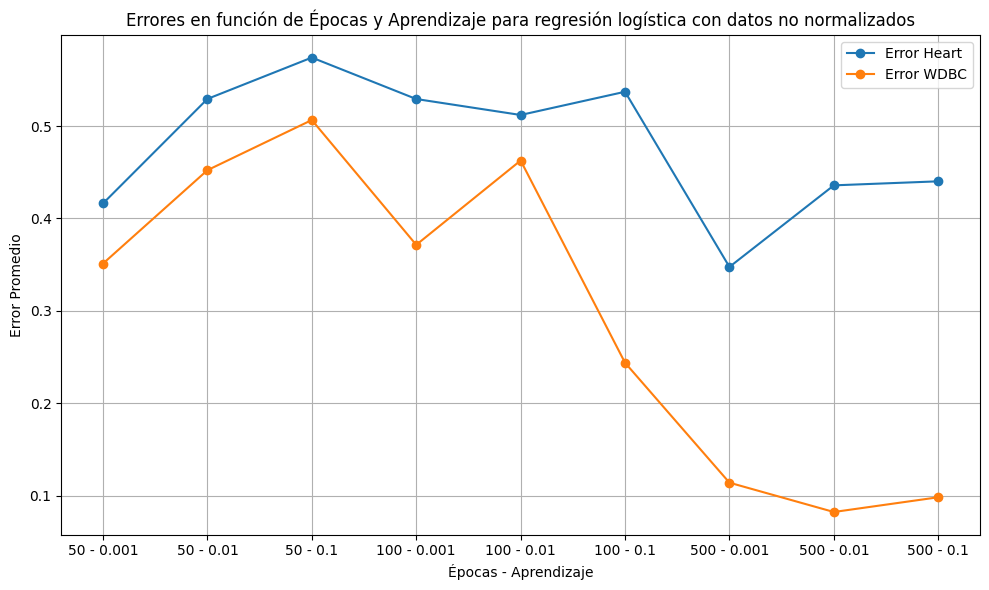

In [7]:
import numpy as np
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt

error_heart = []
error_wdbc = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl = ClasificadorRegresionLogistica(epocas=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart.append(np.mean(rl.validacion(validacion_cruzada, dataset_heart, rl)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc.append(np.mean(rl.validacion(validacion_cruzada, dataset_wdbc, rl)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

print(f"Error mínimo regresión logística en Heart:{min(error_heart)}, obtenido con {epocas[error_heart.index(min(error_heart)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart.index(min(error_heart)) % 3]}")
print(f"Error mínimo regresión logística en WDBC: {min(error_wdbc)}, obtenido con {epocas[error_wdbc.index(min(error_wdbc)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc.index(min(error_wdbc)) % 3]}")

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart, label="Error Heart", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje para regresión logística con datos no normalizados")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Error mínimo regresión logística en Heart:0.1710976478973628, obtenido con 500 épocas y ratio de aprendizaje 0.1
Error mínimo regresión logística en WDBC:0.022869119701909642, obtenido con 500 épocas y ratio de aprendizaje 0.1


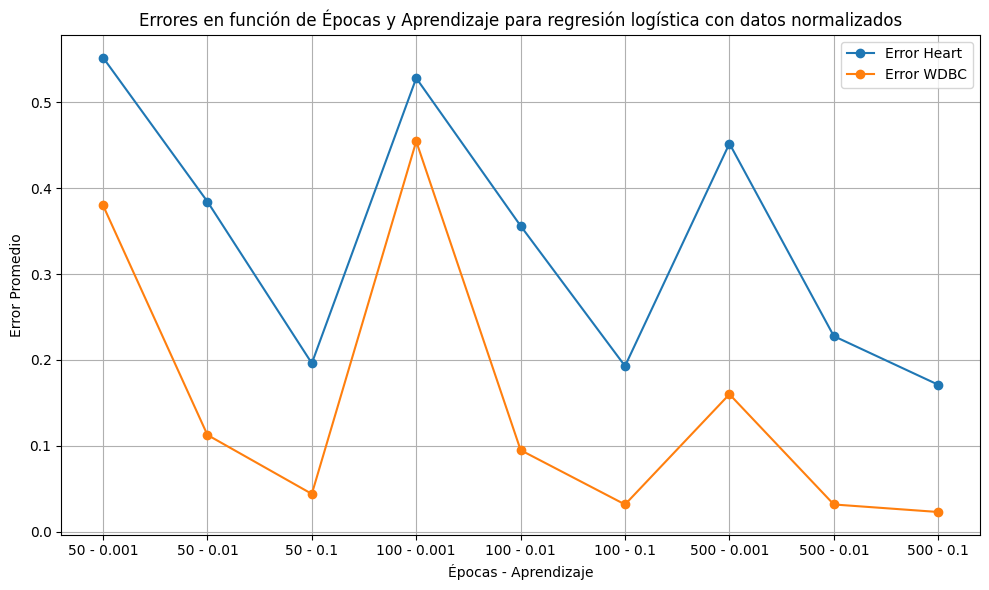

In [12]:
import numpy as np
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt

error_heart = []
error_wdbc = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl = ClasificadorRegresionLogistica(epocas=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart.append(np.mean(rl.validacion(validacion_cruzada, dataset_heart_norm, rl)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc.append(np.mean(rl.validacion(validacion_cruzada, dataset_wdbc_norm, rl)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

print(f"Error mínimo regresión logística en Heart:{min(error_heart)}, obtenido con {epocas[error_heart.index(min(error_heart)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart.index(min(error_heart)) % 3]}")
print(f"Error mínimo regresión logística en WDBC:{min(error_wdbc)}, obtenido con {epocas[error_wdbc.index(min(error_wdbc)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc.index(min(error_wdbc)) % 3]}")

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart, label="Error Heart", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje para regresión logística con datos normalizados")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Podemos observar que la no estandarización de las características afecta directamente al rendimiento de la regresión logística esto es debido a la naturaleza del proceso de cálculo de pesos. Cuando existen características con escalas significativamente diferentes, aquellas con valores mayores introducen un factor de cambio desproporcionado para las componentes del vector de pesos que correspondan a estos valores, esto introduce un sesgo en los pesos estimados, y como resultado, el modelo puede subestimar o ignorar la contribución de características relevantes pero con menor escala, impactando negativamente la precisión y generalización del clasificador. Este efecto se observa claramente en ambos datasets: en "Heart" vemos un error mínimo de 0.41 para el caso sin estandarizar y 0.17 para el caso estandarizado, es decir, el estandarizado genera una clasificación 2.41 veces mejor; mientras que en el dataset "WDBC" los errores son 0.10 sin estandarizar y 0.02 estandarizado, teniendo una clasificación 5 veces mejor para el caso estandarizado. Por ello vamos a emplear los datos estandarizados para las regresiones logísticas.

Por otra parte, analizando cómo varía la precisión del modelo y la tasa de error en función del número de épocas y el factor de aprendizaje apreciamos una tendencia clara: al incrementar ambos parámetros, el error disminuye considerablemente, indicando que el modelo logra aprender de manera más efectiva y con mayor capacidad de ajuste. Sin embargo, si incrementasemos el número de épocas y/o factor de aprendizaje veriamos como este efecto no es lineal, ya que existe un punto en el que aumentar el número de épocas o el factor de aprendizaje deja de ser beneficioso y conduce al sobreentrenamiento.
En este caso, se observa un rendimiento óptimo alrededor de 500 épocas y un factor de aprendizaje de 0.1, donde el modelo alcanza un balance ideal entre tiempo de entrenamiento y precisión. Esta combinación específica permite aprovechar al máximo los datos sin caer en problemas como un aprendizaje demasiado lento (factores de aprendizaje bajos) o la falta de ajuste por sobreentrenamiento (épocas excesivas o factores altos).

# Apartado 2
Resultados de la clasificación utilizando los algoritmos de
Scikit-Learn para regresión logística. Comparación con los
resultados de la implementación propia. En los resultados
utilizar los mismos valores de constante de aprendizaje y
pasos que en la implementación propia.

Error mínimo regresión logística SKlearn en Heart: 0.16783677833214541, obtenido con 50 épocas y ratio de aprendizaje 0.1
Error mínimo SGD en Heart: 0.15915894511760512, obtenido con 500 épocas y ratio de aprendizaje 0.01
Error mínimo regresión logística SKlearn en WDBC: 0.026346840552709205, obtenido con 50 épocas y ratio de aprendizaje 0.1
Error mínimo SGD en WDBC: 0.024592454587796925, obtenido con 50 épocas y ratio de aprendizaje 0.01


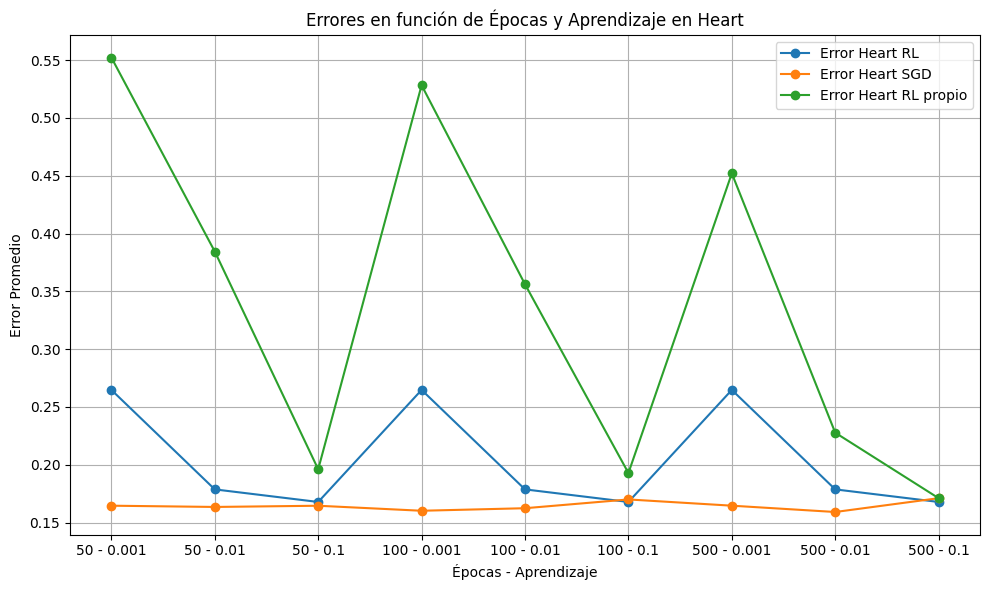

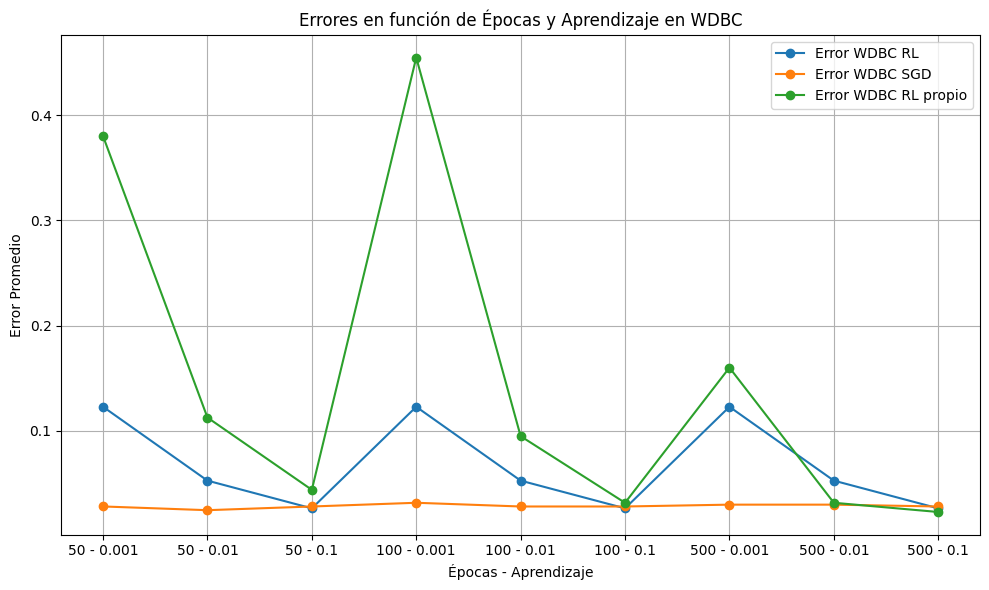

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ClasificadorRegresionLogistica import ClasificadorRegresionLogisticaSK, ClasificadorSGD
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada

error_heart_logsk = []
error_wdbc_logsk = []
error_heart_sgdsk = []
error_wdbc_sgdsk = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl_sk = ClasificadorRegresionLogisticaSK(maxiter=epoca, aprendizaje=aprendizaje)
        sgd_sk = ClasificadorSGD(maxiter=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart_sgdsk.append(np.mean(sgd_sk.validacion(validacion_cruzada, dataset_heart_norm, sgd_sk)))
        error_heart_logsk.append(np.mean(rl_sk.validacion(validacion_cruzada, dataset_heart_norm, rl_sk)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc_sgdsk.append(np.mean(sgd_sk.validacion(validacion_cruzada, dataset_wdbc_norm, sgd_sk)))
        error_wdbc_logsk.append(np.mean(rl_sk.validacion(validacion_cruzada, dataset_wdbc_norm, rl_sk)))

print(f"Error mínimo regresión logística SKlearn en Heart: \
{min(error_heart_logsk)}, obtenido con {epocas[error_heart_logsk.index(min(error_heart_logsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart_logsk.index(min(error_heart_logsk)) % 3]}")
print(f"Error mínimo SGD en Heart: \
{min(error_heart_sgdsk)}, obtenido con {epocas[error_heart_sgdsk.index(min(error_heart_sgdsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart_sgdsk.index(min(error_heart_sgdsk)) % 3]}")

print(f"Error mínimo regresión logística SKlearn en WDBC: \
{min(error_wdbc_logsk)}, obtenido con {epocas[error_wdbc_logsk.index(min(error_wdbc_logsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc_logsk.index(min(error_wdbc_logsk)) % 3]}")
print(f"Error mínimo SGD en WDBC: \
{min(error_wdbc_sgdsk)}, obtenido con {epocas[error_wdbc_sgdsk.index(min(error_wdbc_sgdsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc_sgdsk.index(min(error_wdbc_sgdsk)) % 3]}")

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart_logsk, label="Error Heart RL", marker='o')
plt.plot(labels, error_heart_sgdsk, label="Error Heart SGD", marker='o')
plt.plot(labels, error_heart, label="Error Heart RL propio", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje en Heart")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(labels, error_wdbc_logsk, label="Error WDBC RL", marker='o')
plt.plot(labels, error_wdbc_sgdsk, label="Error WDBC SGD", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC RL propio", marker='o')
plt.title("Errores en función de Épocas y Aprendizaje en WDBC")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

En la implementación de la regresión logística en SKlearn, se observa una menor sensibilidad al número de épocas y al factor de aprendizaje, esto puede atribuirse al uso del solver por defecto LBFGS. Este algoritmo está diseñado específicamente para problemas como la regresión logística, utilizando métodos basados en gradientes y aproximaciones hessianas para encontrar eficientemente el mínimo de la función. Como se observa en las gráficas, LBFGS logra una convergencia incluso con un número reducido de épocas (50) y factores de aprendizaje amplios (0.1), lo que se traduce en un error promedio más estable y bajo en ambos datasets que los de nuestra implimentación, la cual requiere de un número elevado de épocas y un aprendizaje alto para la convergencia. Esto se debe a que LBFGS no depende directamente de un proceso iterativo controlado por épocas o factores de aprendizaje, lo que minimiza la necesidad de ajuste manual de hiperparámetros.

Por otra parte, el algoritmo basado en SGD muestra un comportamiento insensible frente a cambios en el número de épocas o factores de aprendizaje. Esto puede deberse a la naturaleza estocástica del método, que tiende a converger rápidamente hacia mínimos locales.

# Apartado 3
Para la evaluación de los Espacios ROC y la Curva AUC de los modelos pertinentes para nuestros 3 datasets(HEART, IRIS, WDBC), usarmeos los siguientes hiperparámetros y condiciones.

Para Naive Bayes usaremos una Validación Simple debido a que en la primera práctica vimos que fue lo más óptimo a la hora de analizar los resultados.

Para KNN, usaremos una Validación Simple + un valor de K=11.

Y finalmente, para nuestra regresión lineal usaremos un n_epoch = 500 y un learning rate de 0.1, podemos ver como en el apartado anterior obtuvimos los mejores resultados con dichos hiperparámetros.




Dataset: HEART

Clasificador: Naive Bayes
Predicciones binarias generadas: [0 1 1 1 1 1 1 1 1 1]
TP: 144, FP: 21, TN: 99, FN: 11
TPR: 0.9290322580645162, FPR: 0.175

Clasificador: KNN
Predicciones binarias generadas: [0 1 1 1 1 1 1 1 0 1]
TP: 137, FP: 14, TN: 106, FN: 18
TPR: 0.8838709677419355, FPR: 0.11666666666666667

Clasificador: Regresión Logística
Scores generados por el modelo: [0.51088673 0.91709393 0.89942819 0.92137315 0.8983138  0.98060102
 0.70317325 0.8121382  0.65739448 0.25887158]
Predicciones binarias generadas: [1 1 1 1 1 1 1 1 1 0]
TP: 141, FP: 18, TN: 102, FN: 14
TPR: 0.9096774193548387, FPR: 0.15
AUC: 0.9357795698924734


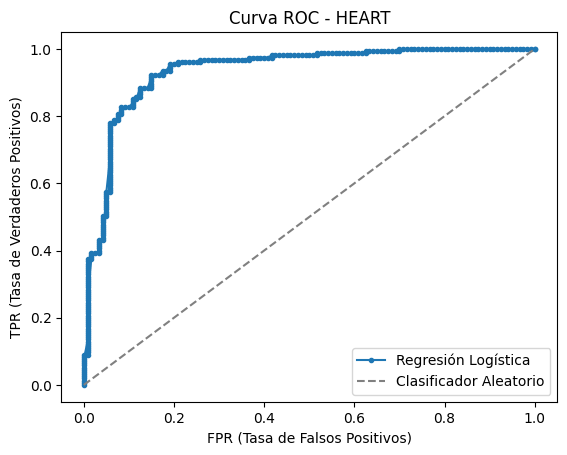

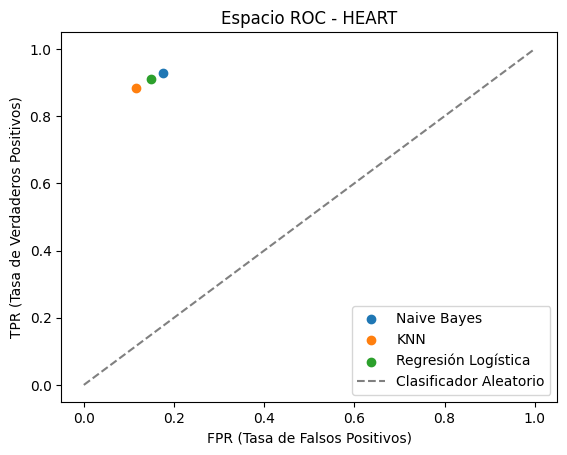


Dataset: WDBC

Clasificador: Naive Bayes
Predicciones binarias generadas: [1 1 1 1 0 1 0 0 0 0]
TP: 61, FP: 4, TN: 101, FN: 5
TPR: 0.9242424242424242, FPR: 0.0380952380952381

Clasificador: KNN
Predicciones binarias generadas: [1 1 1 1 0 1 0 0 0 0]
TP: 63, FP: 1, TN: 104, FN: 3
TPR: 0.9545454545454546, FPR: 0.009523809523809525

Clasificador: Regresión Logística
Scores generados por el modelo: [0.99997998 0.99999986 0.99999836 0.93441149 0.00376587 0.99999946
 0.00585123 0.00542788 0.00823559 0.00108671]
Predicciones binarias generadas: [1 1 1 1 0 1 0 0 0 0]
TP: 64, FP: 3, TN: 102, FN: 2
TPR: 0.9696969696969697, FPR: 0.02857142857142857
AUC: 0.9975468975468975


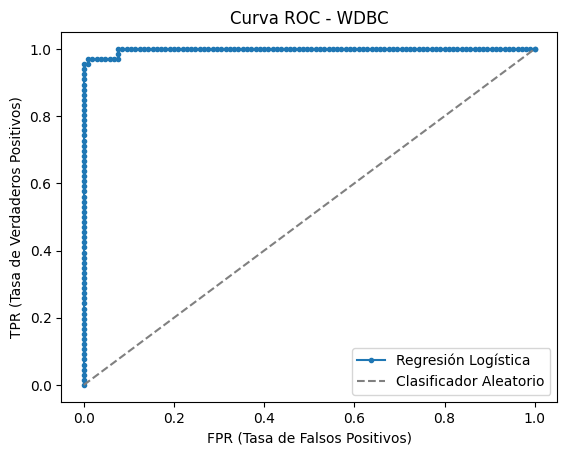

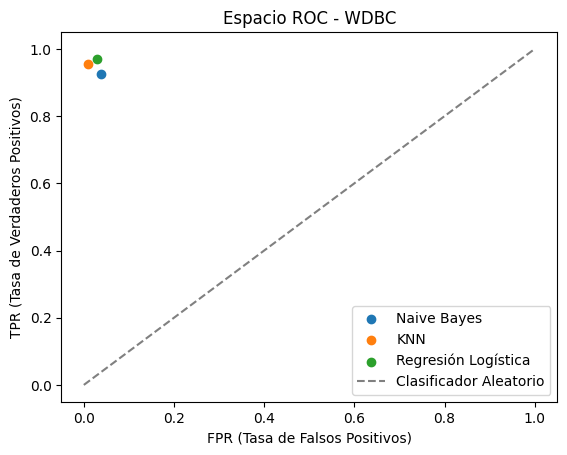


Dataset: IRIS

Clasificador: Naive Bayes
Predicciones binarias generadas: [0 1 0 0 1 1 1 0 0 0]
TP: 57, FP: 2, TN: 102, FN: 10
TPR: 0.8507462686567164, FPR: 0.019230769230769232

Clasificador: KNN
Predicciones binarias generadas: [0 1 0 0 1 1 1 0 0 0]
TP: 57, FP: 0, TN: 104, FN: 10
TPR: 0.8507462686567164, FPR: 0.0

Clasificador: Regresión Logística
Scores generados por el modelo: [5.77091615e-04 1.00000000e+00 9.40024636e-02 8.66693283e-04
 9.99997392e-01 9.93172465e-01 9.91197917e-01 3.07874484e-03
 2.01210866e-03 6.02408453e-05]
Predicciones binarias generadas: [0 1 0 0 1 1 1 0 0 0]
TP: 64, FP: 1, TN: 103, FN: 3
TPR: 0.9552238805970149, FPR: 0.009615384615384616
AUC: 0.9908151549942592


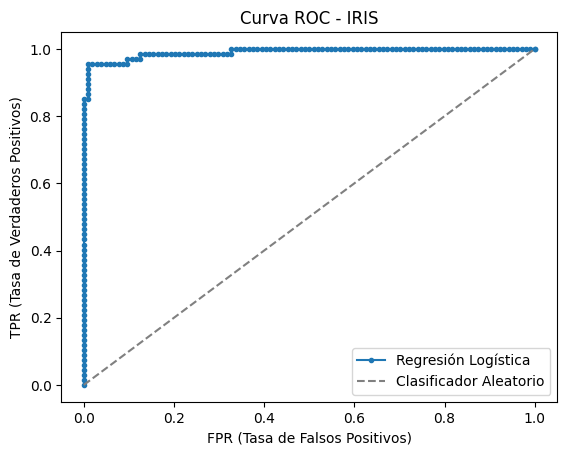

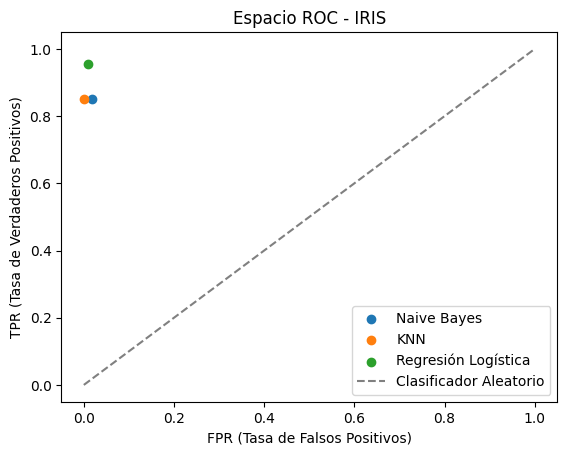

In [15]:
import Datos
import numpy as np
from EstrategiaParticionado import ValidacionSimple
from ClasificadorNB import ClasificadorNaiveBayes
from ClasificadorKNN import ClasificadorKNN
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
import matplotlib.pyplot as plt

datasets = ['Datasets/heart.csv', 'Datasets/wdbc.csv', 'Datasets/wdbc.csv']
nombres_datasets = ['HEART', 'WDBC', 'IRIS']

clasificadores = {
    'Naive Bayes': ClasificadorNaiveBayes(),
    'KNN': ClasificadorKNN(K=11),
    'Regresión Logística': ClasificadorRegresionLogistica(epocas=500, aprendizaje=0.1)
}

for idx_dataset, dataset_name in enumerate(datasets):
    print(f"\nDataset: {nombres_datasets[idx_dataset]}")
    dataset = Datos.Datos(dataset_name)
    
    # Preparar validación simple
    particionado = ValidacionSimple(1, 0.3)  
    particiones = particionado.creaParticiones(dataset.datos)
    
    particion = particiones[0]
    datos_train = dataset.extraeDatos(particion.indicesTrain).reset_index(drop=True)
    datos_test = dataset.extraeDatos(particion.indicesTest).reset_index(drop=True)
    
    atributos_nominales = dataset.nominalAtributos
    diccionario = dataset.diccionarios
    
    # Normalizar los datos con la función `estandarizarDatos`
    datos_train, media, std = Datos.estandarizarDatos(datos_train, atributos_nominales, diccionario)
    datos_test, _, _ = Datos.estandarizarDatos(datos_test, atributos_nominales, diccionario, media, std)
    
    TPRs = []
    FPRs = []
    nombres_clasificadores = []
    
    for nombre_clasificador, clasificador in clasificadores.items():
        print(f"\nClasificador: {nombre_clasificador}")

        clasificador.entrenamiento(datos_train, atributos_nominales, diccionario)

        if nombre_clasificador == 'Regresión Logística':
            scores, predicciones = clasificador.clasifica(datos_test, atributos_nominales, diccionario, return_scores=True)
            print("Scores generados por el modelo:", scores[:10])
            print("Predicciones binarias generadas:", predicciones[:10])

        else:
            predicciones = clasificador.clasifica(datos_test, atributos_nominales, diccionario)
            print("Predicciones binarias generadas:", predicciones[:10])

        TP, FP, TN, FN = clasificador.matriz_confusion(datos_test, predicciones)
        print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
        
        # Calcular TPR y FPR
        if (TP + FN) > 0:
            TPR = TP / (TP + FN)
        else:
            TPR = 0  # Asignar 0 si el denominador es 0  

        if (FP + TN) > 0:
            FPR = FP / (FP + TN)
        else:
            FPR = 0 
        print(f"TPR: {TPR}, FPR: {FPR}")
        
        TPRs.append(TPR)
        FPRs.append(FPR)
        nombres_clasificadores.append(nombre_clasificador)

        # Curva ROC para la Regresión Logística
        if nombre_clasificador == 'Regresión Logística':
            clases_reales = datos_test['Class'].values

            unique_scores = np.unique(scores)
            umbrales = sorted(unique_scores, reverse=True) 

            TPR_list = []
            FPR_list = []
            
            for umbral in umbrales:
                pred_binarias = (scores >= umbral).astype(int)  # True se convierte en 1, False en 0

                TP_umbral, FP_umbral, TN_umbral, FN_umbral = clasificador.matriz_confusion(datos_test, pred_binarias)

                # Calcular TPR (True Positive Rate)
                if (TP_umbral + FN_umbral) > 0:
                    TPR_umbral = TP_umbral / (TP_umbral + FN_umbral)
                else:
                    TPR_umbral = 0  # Asignar 0 si el denominador es 0  

                # Calcular FPR (False Positive Rate)
                if (FP_umbral + TN_umbral) > 0:
                    FPR_umbral = FP_umbral / (FP_umbral + TN_umbral)
                else:
                    FPR_umbral = 0  

                TPR_list.append(TPR_umbral)
                FPR_list.append(FPR_umbral) 
            
            TPR_list.insert(0, 0)
            TPR_list.append(1)

            FPR_list.insert(0, 0)
            FPR_list.append(1)

            sorted_indices = np.argsort(FPR_list)
            
            FPR_list = np.array(FPR_list)[sorted_indices]
            TPR_list = np.array(TPR_list)[sorted_indices]

            auc = 0
            for i in range(1, len(FPR_list)):  # Fórmula del cálculo del área de un trapecio (base * (altura derecha + altura izq) /2)
                auc += (FPR_list[i] - FPR_list[i-1]) * (TPR_list[i] + TPR_list[i-1]) / 2
            auc = auc 
            print(f"AUC: {auc}")

            plt.figure()
            plt.plot(FPR_list, TPR_list, marker='.', label='Regresión Logística')
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador Aleatorio')
            plt.title(f'Curva ROC - {nombres_datasets[idx_dataset]}')
            plt.xlabel('FPR (Tasa de Falsos Positivos)')
            plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
            plt.legend()
            plt.show()

    plt.figure()
    for i, nombre_clasificador in enumerate(nombres_clasificadores):
        plt.scatter(FPRs[i], TPRs[i], label=nombre_clasificador)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador Aleatorio')
    plt.title(f'Espacio ROC - {nombres_datasets[idx_dataset]}')
    plt.xlabel('FPR (Tasa de Falsos Positivos)')
    plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
    plt.legend()
    plt.show()


Comenzaremos analizando los resultados obtenidos para el dataset de 'HEART'.

Podemos observar que para nuestro Naive Bayes, obtenemos un valor de TPR = 0.89 lo cual podríamos considerarlo como un valor 'alto', aunque su valor de FPR = 0.16, nos propone que aunque Naive Bayes obtiene una buena tasa de verdaderos positivos, también tiene una tasa de falsos negativos más alto que el resto de casos que vamos a explorar. Por lo general es un modelo sólido.

El segundo modelo a analizar, el KNN con K = 11, nos otorga unos valores de TPR = 0.85, ligeramente inferior a NB pero con un FPR = 0.14, identificando menos falsos negativos que NB.

Por último, nuestra Regresión Logística obtiene unos reusltados parecidos a KNN, con un TPR = 0.83, el más bajo de todos y con un FPR = 0.14.

Ahora bien, dado el contexto de este dataset, el cual se basa en la detección de enfermedades, debemos priorizar el valor de TPR.ya que identificar correctamente los casos positivos (personas enfermas) es generalmente más importante que minimizar los falsos positivos (personas sanas mal diagnosticadas). A pesar de tener el valor más alto de FPR de los 3 modelos, su superioridad para la detección de los casos positivos nos hacen decantarnos hacia el algoritmo de Naive Bayes usando Validación Simple.


El segundo dataset a analizar es el de WDBC.

El Naive Bayes propio consigue un gran desempeño con un TPR = 0.93 y un FPR = 0.035. Éstos son valores que determinan un modelo exitoso.

El KNN mejora el rendimiento de Naive Bayes se manera significativa, destacando un mejor TPR, con un valor de 0.95, y con una mejora considerable en el FPR, con FPR = 0.018. Esto nos indica que para este dataset nuetsro KNN obtiene una tasa de falsos positivos menor a la de NB.

Finalmente, el modelo de Regresión Logística es el que mejor se adapta sin ningún tipo de duda, podemos observar en el espacio ROC la manera en la que se ajusta de manera casi perfecta a los datos. Hemos obtenido un valor de TPR = 1.0(PERFECTO) y un FPR = 0.044

Aunque todos los clasificadores funcionan bien, la Regresión Logística supera a los demás con una tasa perfecta de verdaderos positivos y un AUC casi perfecto.


Por último, tenemos el dataset de 'IRIS'.

Para nuestro Naive Bayes, hemos logrado un TPR = 0.92 y un FPR = 0.08, mostrando un desempeño muy bueno con un TPR alto y un FOR moderado.

El KNN propio mejora el TPR anterior con un valor de 0.94 y mantiene un FPR parecido, con un valor también de 0.09. KNN es capaz de lograr un excelente equilibrio entre un TPR muy alto y un FPR moderado.

Finalmente, una vez más, nuetsra Regresión Logística mejora con creces a ambos modelos con una tasa de positivos reales casi perfecta. TPR = 0.98 y un FPR igualado a los anteriores (0.09). 

Es por ello que para este último datset concluimos conque la Regresión Logística es el que mejor se ha conseguido adaptar, aunque los resultados de los otros 2 modelos también son muy aceptables.

Una vez terminada esta observación de los 3 datasets, podemos concluir que:

El éxito de la regresión logística en los datasets WDBC e IRIS, en comparación con el dataset HEART, se debe principalmente a las diferencias en la naturaleza de las características y la separabilidad de las clases en los datos.

En el caso de HEART, el dataset contiene una combinación de variables categóricas y numéricas que a pesar de que sean relevantes, introducen cierta complejidad y ruido al modelo. Desde la perspectiva de la Regresión Logística, esto produce un efecto adverso a la hora de encontrar patrones que sean considerados efectivos debido a que no es un modelo capacitado para manejar relaciones no lineales o lo que vendría siendo en nuestro caso, interacciones complejas entre variables.

Por otro lado, en WDBC, las características son exclusivamente numéricas, continuas altamenete correlacionadas entre sí, lo que permite a la regresión logística modelar eficazmente las relaciones entre las variables y las clases. En IRIS, el dataset es aún más simple, con solo cuatro características numéricas que describen dimensiones físicas de flores, y las clases están claramente separadas en el espacio de características, lo que facilita la identificación de límites de decisión lineales.

# Apartado 4
Análisis descrito en la sección de Tareas para el algoritmo de
clustering K-means, es decir:

• Para K=3, comprobar si se puede asignar de forma unívoca cada
clúster a un tipo de flor atendiendo a la clase mayoritaria de los
patrones agrupados por clúster

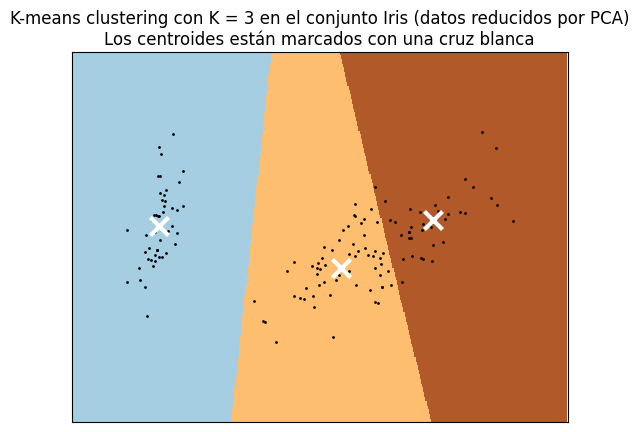

Asignaciones de clusteres a clases mayoritarias:
Clúster 0: Clase mayoritaria 0
Clúster 1: Clase mayoritaria 1
Clúster 2: Clase mayoritaria 2
Cada cluster se asigna de forma unívoca a una clase.


In [18]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt

X = iris_data.drop(columns='Class').values
y = iris_data['Class'].values

kmeans = ClusteringKMeans(3)
centroides, asignaciones = kmeans.kmeans(iris_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
centroides_reducidos = pca.transform(centroides)

h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_data)

distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
Z = np.argmin(distancias_grid, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect='auto',
    origin='lower'
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

plt.scatter(
    centroides_reducidos[:, 0],
    centroides_reducidos[:, 1],
    marker='x',
    s=169,
    linewidths=3,
    color='w',
    zorder=10
)

plt.title(
    f"K-means clustering con K = {3} en el conjunto Iris (datos reducidos por PCA)\n"
    "Los centroides están marcados con una cruz blanca"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

cluster_labels = {}

for cluster in np.unique(asignaciones):
    cluster_indices = np.where(asignaciones == cluster)[0]
    cluster_clases = y[cluster_indices]
    class_counts = Counter(cluster_clases)
    clase_mayor = class_counts.most_common(1)[0][0]
    cluster_labels[cluster] = clase_mayor

print("Asignaciones de clusteres a clases mayoritarias:")
for cluster, clase_mayor in cluster_labels.items():
    print(f"Clúster {cluster}: Clase mayoritaria {clase_mayor}")

unique_clases_mayor = set(cluster_labels.values())
if len(unique_clases_mayor) == len(cluster_labels):
    print("Cada cluster se asigna de forma unívoca a una clase.")
else:
    print("Al menos un cluster no se puede asignar de forma unívoca a una clase.")


El análisis del agrupamiento K-means para K=3 en el conjunto Iris demuestra que los clústeres generados pueden asociarse unívocamente con las clases de flores mediante la identificación de la clase mayoritaria en cada cluster. En concreto podemos ver como la clase Setosa se distingue de manera clara, formando un cluster separado con su centroide a una distancia considerable de los otros dos, lo que refleja patrones característicos y bien definidos en sus características. 

Por otro lado, las clases Versicolor y Virginica forman unos centroides cercanos y con datos de ambos clusters cercanos a la frontera de decisión. A pesar de esta cierta superposición en sus características, pueden separarse suficientemente, permitiendo que cada clúster esté dominado por una clase. 

• Analizar qué tipos de flor se identifican más fácilmente (con menos
errores), cuales más difícilmente (con más errores), y cuales se
confunden entre ellos. Para ello se puede hacer uso de la matriz de
confusión multiclase a partir del número de puntos en cada clase y
sabiendo que hay 50 ejemplos de cada tipo de flor.

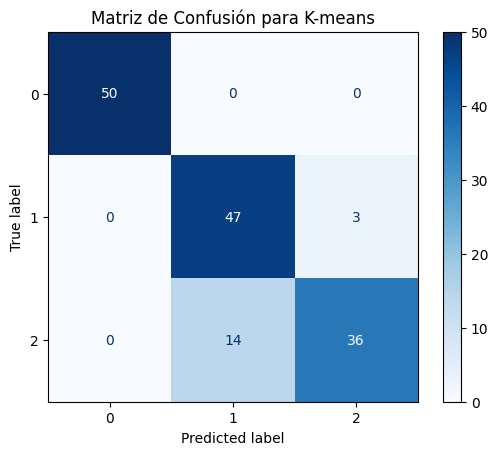

In [19]:
unique_clusters = np.unique(asignaciones)
cluster_labels = {}

for cluster in unique_clusters:
    cluster_indices = np.where(asignaciones == cluster)[0]
    cluster_clases = y[cluster_indices]
    clase_mayor = np.bincount(cluster_clases).argmax() 
    cluster_labels[cluster] = clase_mayor

predicciones = np.array([cluster_labels[cluster] for cluster in asignaciones])

cm = confusion_matrix(y, predicciones)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para K-means")
plt.show()

La matriz de confusión obtenida con K-means para K=3 en el conjunto Iris nos muestra que la clase Setosa es perfectamente identificada como se había determinado anteriormente, ya que sus 50 ejemplos están correctamente agrupados, sugiriendo que nuestra hipótesis de que sus características son claramente distintivas y permiten una separación directa respecto a las demás clases es correcta. Por otro lado, la clase Versicolor presenta un alto nivel de precisión, aunque se da una ligera confusión con la clase Virginica, lo que indica que, en efecto, existe una superposición entre ambas. En contraste, la clase Virginica resulta la más difícil de identificar, evidenciando un solapamiento significativo en las características de estas dos clases. Este resultado refleja que Setosa es la clase más fácil de separar, mientras que la confusión predominante entre Versicolor y Virginica destaca la complejidad de diferenciar estos grupos (especialmente el grupo de Virginica) en el espacio de características utilizado.

• Probar con otros valores de K = [2,4,5] y comparar los resultados con
los obtenidos para k=3. ¿Cuál sería el mejor K para este problema?

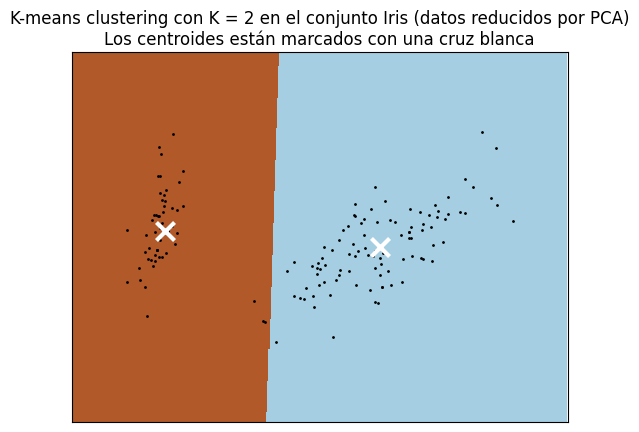

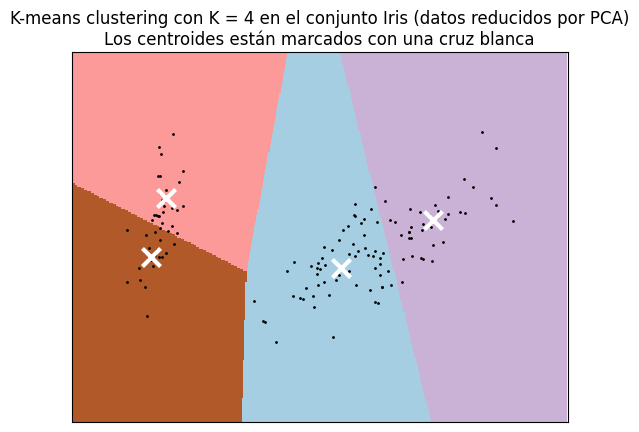

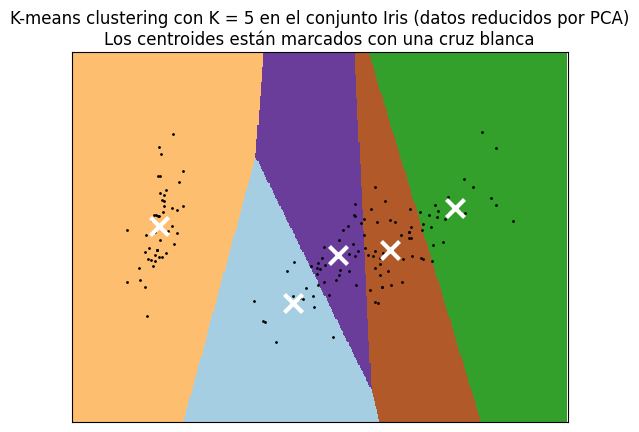

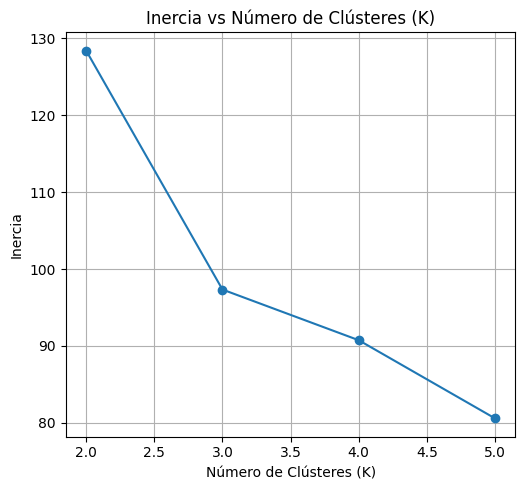

In [21]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
import matplotlib.pyplot as plt

k_values = [2,3,4,5]
inercias = []

for k in k_values:
    
    X = iris_data.drop(columns='Class').values
    y = iris_data['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data)

    inercia = np.sum([np.linalg.norm(X[asignaciones == i] - centroides[i], axis=1).sum() for i in range(k)])
    inercias.append(inercia)

    if k != 3:
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(X)
        centroides_reducidos = pca.transform(centroides)
        
        h = 0.02
        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h)
        )
        
        grid_data = np.c_[xx.ravel(), yy.ravel()]
        grid_original = pca.inverse_transform(grid_data)
        
        distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
        Z = np.argmin(distancias_grid, axis=1)
        Z = Z.reshape(xx.shape)
        
        plt.figure(1)
        plt.clf()
        plt.imshow(
            Z,
            interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired,
            aspect='auto',
            origin='lower'
        )
        
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        
        plt.scatter(
            centroides_reducidos[:, 0],
            centroides_reducidos[:, 1],
            marker='x',
            s=169,
            linewidths=3,
            color='w',
            zorder=10
        )
        
        plt.title(
            f"K-means clustering con K = {k} en el conjunto Iris (datos reducidos por PCA)\n"
            "Los centroides están marcados con una cruz blanca"
        )
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inercias, marker='o', label='Inercia')
plt.title('Inercia vs Número de Clústeres (K)')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.grid()

plt.tight_layout()
plt.show()

Al analizar los resultados del agrupamiento con K-means para diferentes valores de K (K=2,3,4,5), observamos diferencias significativas en la interpretación de los clústeres:

Con K=2, el modelo separa principalmente la clase Setosa de las demás, lo que es esperado debido a las características bien diferenciadas de esta clase. Sin embargo, las clases Versicolor y Virginica se agrupan en un único cluster, lo que no captura correctamente la estructura real del dataset.

Para K=3, los clústeres se ajustan mejor a la estructura del conjunto Iris. La clase Setosa forma un clúster perfectamente separado, mientras que las clases Versicolor y Virginica presentan una ligera superposición cerca de la frontera de decisión, pero cada clúster está dominado por una clase, capturando adecuadamente las relaciones entre las clases.

Para K=4 y K=5, los clústeres comienzan a dividirse de manera más específica, pero esto genera clústeres redundantes y fronteras de decisión más complejas, especialmente en las regiones de Versicolor y Virginica. Estos valores de K no solo aumentan innecesariamente la complejidad del modelo, sino que también dificultan la interpretación de los resultados.

Para confirmar estas suposiciones obtenidas a través de las gráficas y hallar el mejor valor de K hemos utilizado la inercia, la cual mide la suma de las distancias cuadradas entre cada punto y el centroide de su clúster, proporcionando una medida de la compactación de los clústeres. Al probar con K=[2,3,4,5], observamos que la inercia disminuye significativamente al pasar de K=2 a K=3, lo que indica una mejora importante en la calidad del agrupamiento al incluir un tercer clúster, sin embargo, para K>3, la reducción en la inercia es mucho menos pronunciada, lo que sugiere que añadir más clústeres no aporta una mejora sustancial y aumenta innecesariamente la complejidad del modelo. Esto refleja un punto de codo en K=3, que representa un buen equilibrio entre la compactación de los clústeres y la simplicidad del modelo. Por lo tanto, concluimos que el mejor valor de K para este problema es K=3, ya que permite capturar adecuadamente la estructura del conjunto de datos y coincide con nuestro conocimiento previo de que el conjunto Iris contiene tres clases.

• Analizar si se obtendrían otros resultados
normalizando los datos

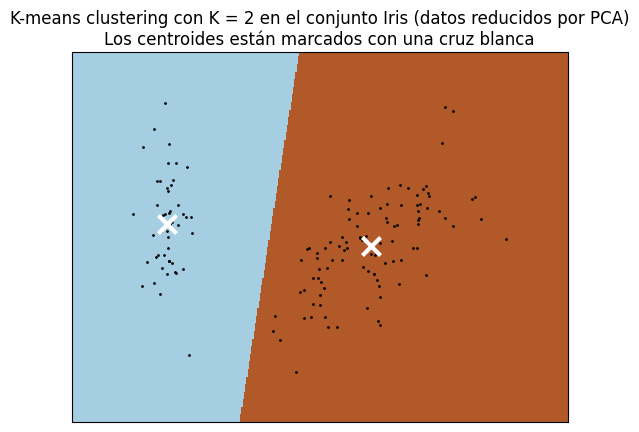

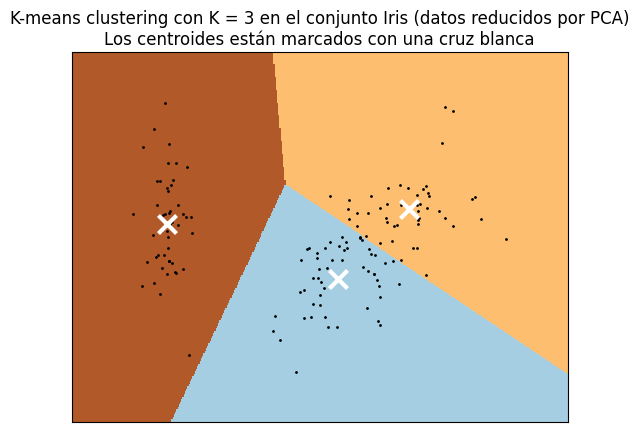

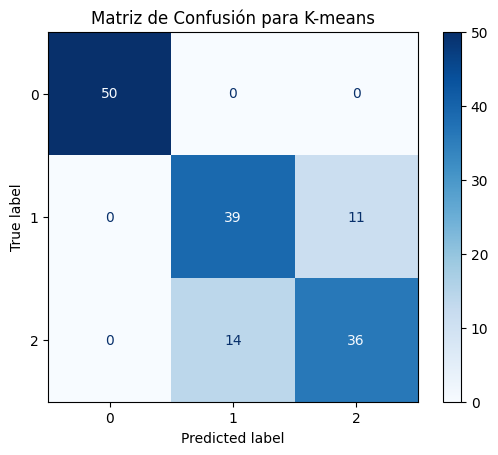

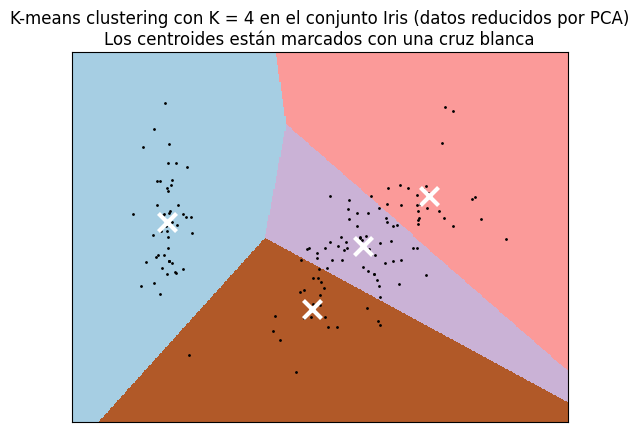

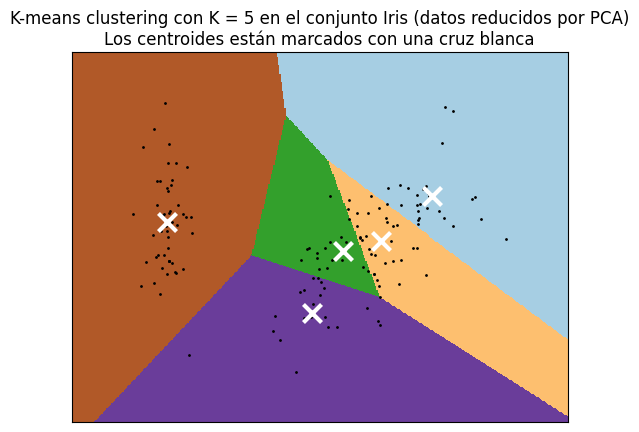

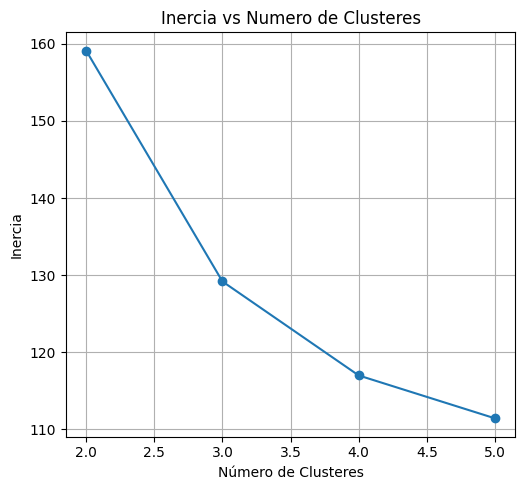

In [22]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt

k_values = [2,3,4,5]
inercias = []

for k in k_values:
    
    X = iris_data_norm.drop(columns='Class').values
    y = iris_data_norm['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data_norm)

    inercia = np.sum([np.linalg.norm(X[asignaciones == i] - centroides[i], axis=1).sum() for i in range(k)])
    inercias.append(inercia)

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    centroides_reducidos = pca.transform(centroides)
    
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_data)
    
    distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
    Z = np.argmin(distancias_grid, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin='lower'
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    plt.scatter(
        centroides_reducidos[:, 0],
        centroides_reducidos[:, 1],
        marker='x',
        s=169,
        linewidths=3,
        color='w',
        zorder=10
    )
    
    plt.title(
        f"K-means clustering con K = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


    if k == 3:
        unique_clusters = np.unique(asignaciones)
        cluster_labels = {}
        
        for cluster in unique_clusters:
            cluster_indices = np.where(asignaciones == cluster)[0]
            cluster_clases = y[cluster_indices]
            clase_mayor = np.bincount(cluster_clases).argmax() 
            cluster_labels[cluster] = clase_mayor
        
        predicciones = np.array([cluster_labels[cluster] for cluster in asignaciones])
        
        cm = confusion_matrix(y, predicciones)
        ConfusionMatrixDisplay(cm, display_labels=np.unique(y)).plot(cmap=plt.cm.Blues)
        plt.title("Matriz de Confusión para K-means")
        plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inercias, marker='o', label='Inercia')
plt.title('Inercia vs Numero de Clusteres')
plt.xlabel('Número de Clusteres')
plt.ylabel('Inercia')
plt.grid()
plt.tight_layout()
plt.show()

El impacto de la estandarización en el rendimiento de K-means es significativo, particularmente en la separación de las clases Versicolor y Virginica, como reflejan tanto las gráficas como las matrices de confusión obtenidas. Sin estandarización, el algoritmo da mayor peso a las características con escalas mayores, lo que facilita una mejor separación entre estas clases, reflejada en una matriz de confusión más precisa y en unas fronteras de clasificación más claras en las gráficas. En cambio, al estandarizar, todas las características adquieren la misma relevancia, incluyendo las menos discriminantes, lo que aumenta la confusión entre Versicolor y Virginica y genera fronteras más difusas y una asignación de puntos menos precisa en las gráficas.

Además, la curva de inercia tras la estandarización muestra una caída es más pronunciada al pasar de K=3 a K=4, esto hace que el punto de codo, que es claro y definido sin estandarización en K=3, sea menos obvio, dificultando la selección óptima de K. Este resultado refuerza la idea de que igualar las escalas estandarizando puede introducir ruido, dificultando la separación en casos con solapamiento significativo. 

Entonces podemos concluir que para este dataset evitar la estandarización mejora el rendimiento del modelo, al aprovechar mejor las características más relevantes para la separación de clases.

# Apartado 5
Repetir el análisis de K-means con la librería Kmeans de
Scikit-learn y comparar los resultados con la
implementación propia

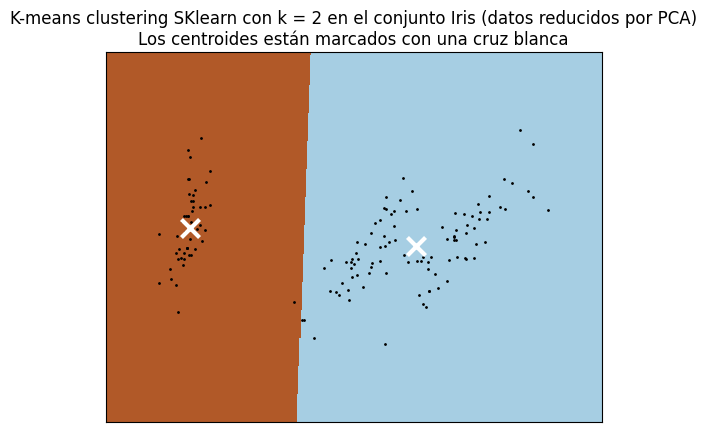

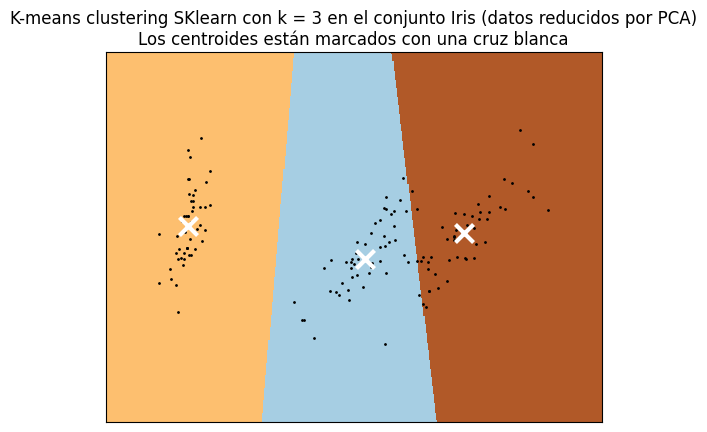

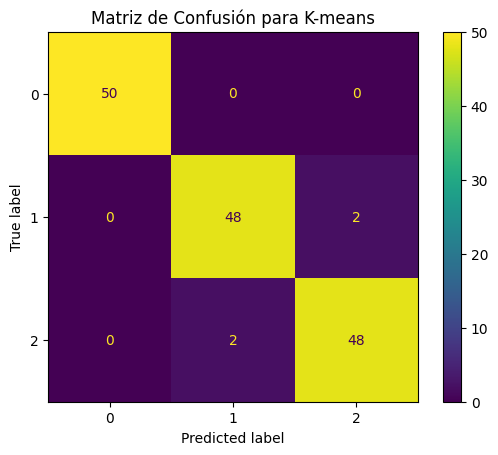

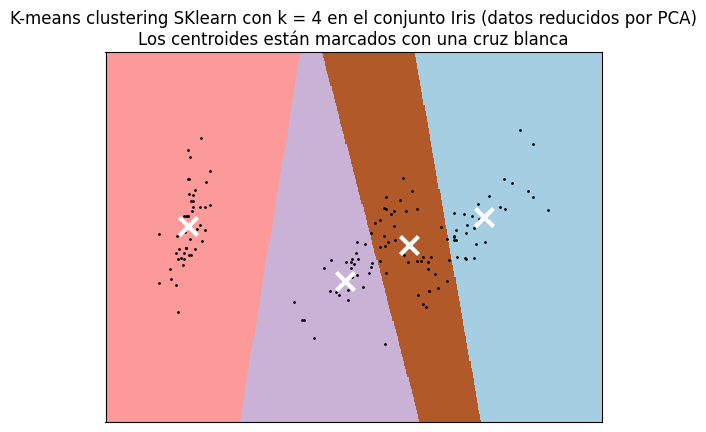

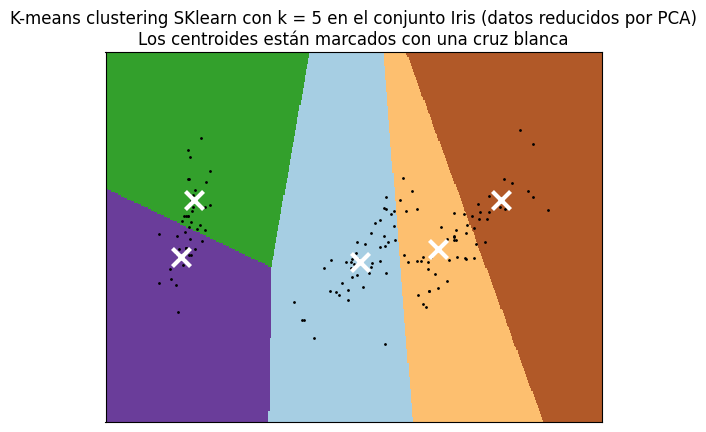

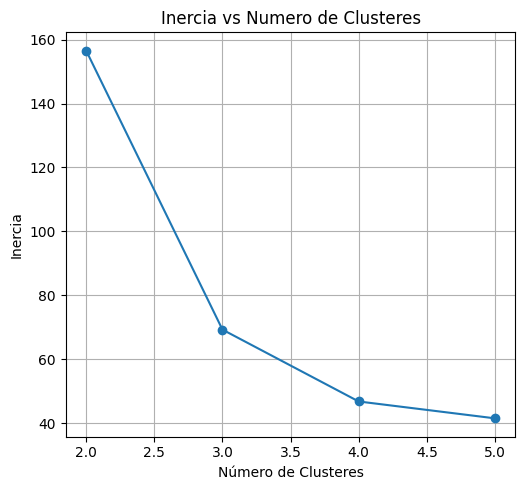

In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from scipy.stats import mode
import matplotlib.pyplot as plt

k_values =[2,3,4,5]
inercias = []

reduced_data = PCA(n_components=2).fit_transform(iris_data)

for k in k_values:
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    inercias.append(kmeans.inertia_)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        labels_true = iris_data['Class']  
        labels_pred = kmeans.labels_ 
        
        new_labels = np.zeros_like(labels_pred)
        for cluster in range(k):
            mask = (labels_pred == cluster)
            new_labels[mask] = mode(labels_true[mask])[0]

        disp = ConfusionMatrixDisplay.from_predictions(labels_true, new_labels)
        plt.title("Matriz de Confusión para K-means")
        plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inercias, marker='o', label='Inercia')
plt.title('Inercia vs Numero de Clusteres')
plt.xlabel('Número de Clusteres')
plt.ylabel('Inercia')
plt.grid()
plt.tight_layout()
plt.show()

Tanto en la implementación propia como Scikit-learn, obtenemos una consistencia en los resultados, aunque también podemos definir ciertas diferencias que podemos considerar como relevantes:

Límites de Decisión y Visualización de Clústeres:

Para K=2, tanto en la implmentación propia como en la implemntación usando Scikit-Learn, podemos identificar que se logra una separación efectiva de los datos en dos clústeres. En este caso, clase Setosa se agrupa en un clúster único debido a que sus carcaterísticas son lo suficientemente distintivas en comparación a las clases Versicolor y Virginica que se mezclan en el segundo clúster.

En ambos casos, los límites de decisión para K=3 están claramente definidos en los clústeres que corresponden a las clases Setossa, Versicolor y Virginica.Seguimos destacando que la clase 'Setosa' está perfectamente identificada en ambos modelos gracias a sus características tan distintivas.

Por otro lado, las clases Versicolor y Virginica presentan una ligera superposición en ambas implementaciones. Pero podemos observar una mejor representación de los límites que se acaban generando, debido a la visible optimización a la hora de seleccionar los centroides iniciales. Esto se podría deber gracias a la incialización "k-means++" en el modelo de Scikit-Learn.

Para K=4, ambas implementaciones dividen la clase Versicolor en dos subgrupos, mientras que Setosa y Virginica permanecen bien definidas. Esto sugiere que el algoritmo intenta forzar clústeres adicionales en estructuras menos evidentes.

Para K=5, la clase Versicolor se fragmenta aún más, con uno de los nuevos clústeres capturando puntos cercanos al límite con Virginica. Aunque esto reduce la inercia, la fragmentación no refleja adecuadamente las clases naturales del conjunto.

La implementación propia mostró resultados muy similares en términos de la separación para K=2 y K=3, pero para K=4 y K=5, los clústeres adicionales no son tan cohorentes. Por otro lado, Scikit logra mantener límites de decisión mejor definidos para todos los valores de K, lo que refleja una mejor optimización del proceso de agrupamiento.

En resumen, tanto la implementación propia como Scikit-learn identifican correctamente las clases principales para K=3, pero Scikit-learn muestra ventajas para valores de K mayores, debido a su capacidad para mantener límites más precisos.

Matriz de Confusión y Precisión:

En Scikit-learn, los resultados son similares a los de nuestra implementación, pero muestran una mejora notable en la precisión, particularmente en la clase Virginica. La matriz de confusión evidencia que Scikit-learn reduce significativamente los errores en la asignación de puntos para esta clase, especialmente cerca de los límites de decisión. Esto se debe a su inicialización optimizada (k-means++) y algoritmos avanzados, que manejan mejor los puntos en regiones solapadas entre Versicolor y Virginica, asegurando una clasificación más precisa y consistente.

Inercia y Convergencia:
La curva de inercia en ambos casos muestra el mismo comportamiento: un claro punto de "codo" en K=3, indicando que este valor captura de manera óptima la estructura de los datos.

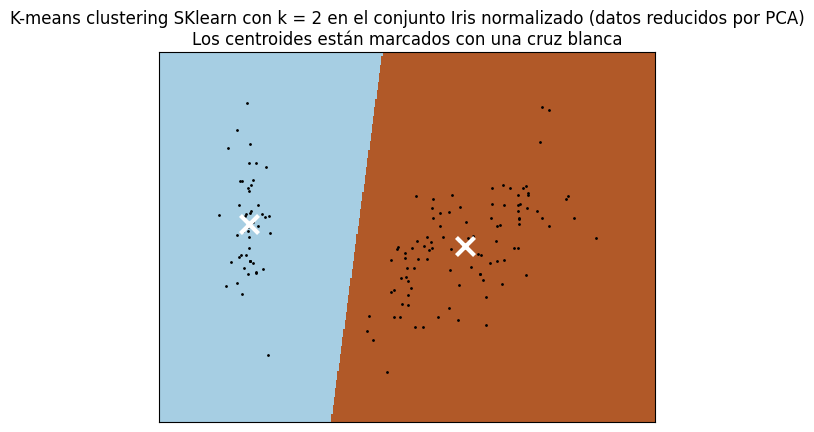

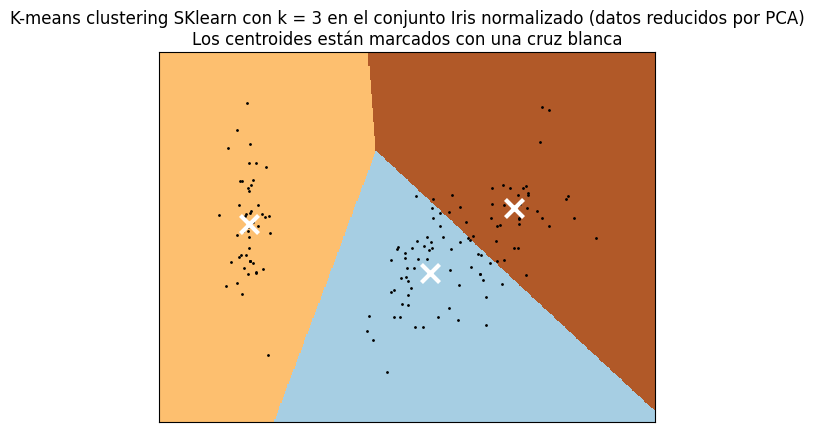

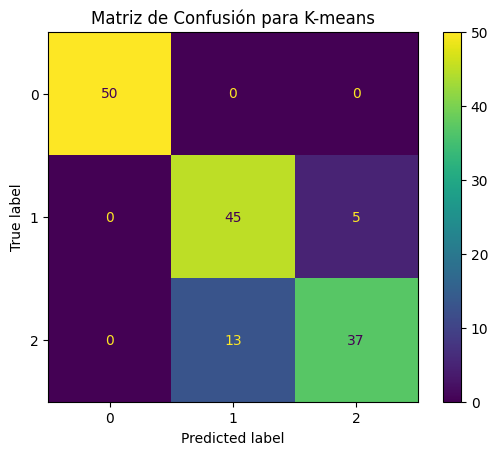

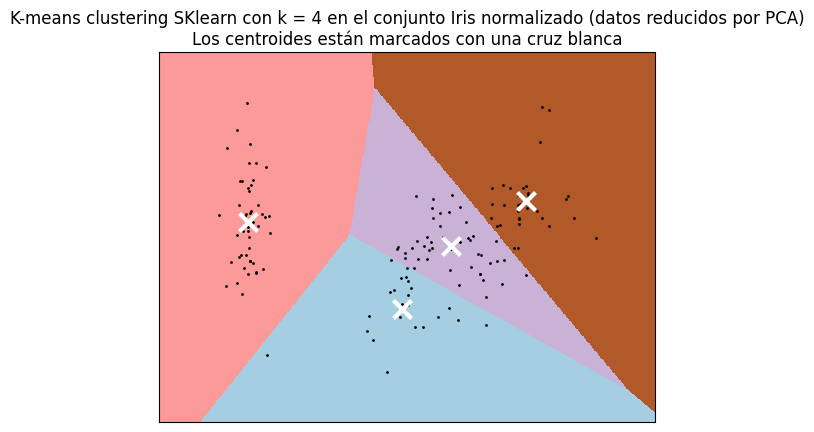

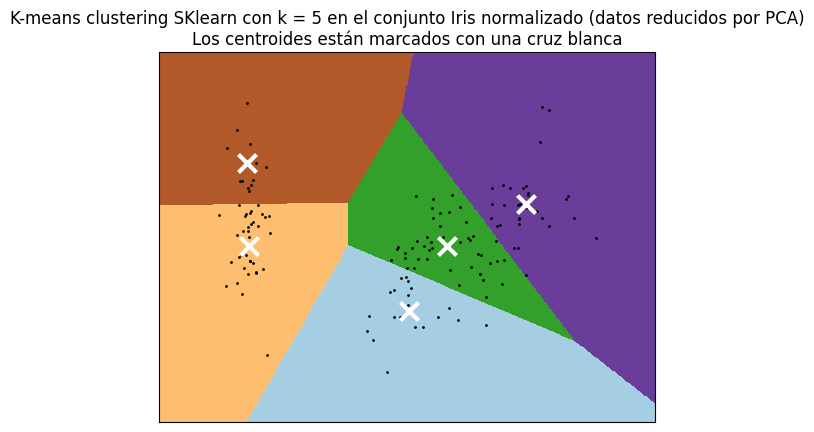

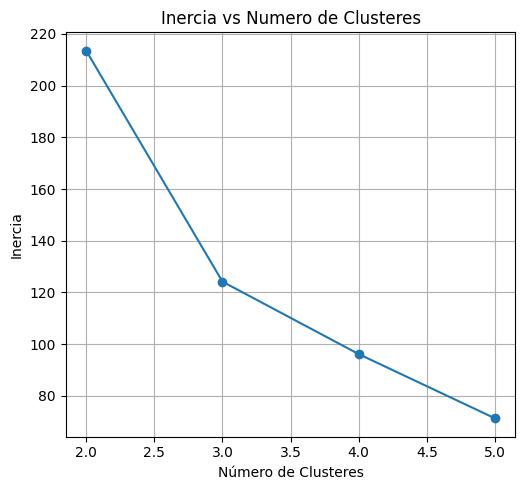

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

k_values =[2,3,4,5]
inercias = []

reduced_data = PCA(n_components=2).fit_transform(iris_data_norm)

for k in k_values:
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    inercias.append(kmeans.inertia_)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris normalizado (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        labels_true = iris_data['Class']  
        labels_pred = kmeans.labels_ 
        
        new_labels = np.zeros_like(labels_pred)
        for cluster in range(k):
            mask = (labels_pred == cluster)
            new_labels[mask] = mode(labels_true[mask])[0]

        disp = ConfusionMatrixDisplay.from_predictions(labels_true, new_labels)
        plt.title("Matriz de Confusión para K-means")
        plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inercias, marker='o', label='Inercia')
plt.title('Inercia vs Numero de Clusteres')
plt.xlabel('Número de Clusteres')
plt.ylabel('Inercia')
plt.grid()
plt.tight_layout()
plt.show()

Comparación de Resultados entre Scikit-learn y la Implementación Propia (Con Normalización)

Al aplicar K-means con datos normalizados, se observan cambios significativos en la calidad del agrupamiento en ambas implementaciones(la propia y la de Scikit). A continuación compararemos los diferentes reusltados obtenidos:

Límites de Decisión:
Con normalización, los límites de decisión que se generan son más equilirados, es decir, todas las características pasan a tener la misma importancia. Sin embargo, esto introduce mayor confusión entre las clases Versicolor y Virginica, debido a que las características menos relevantes, como el ancho del sépalo,etc. pasan a tener un peso equivalente.

En Scikit-learn, los límites de decisión son más estables y definidos en comparación con la implementación propia, gracias a su optimización interna.

Matriz de Confusión y Precisión:

La matriz de confusión para K=3 muestra un aumento en la confusión entre Versicolor y Virginica en ambas implementaciones, reflejando el impacto de la normalización en la pérdida de discriminación entre estas clases.

Scikit-learn logra manejar ligeramente mejor esta confusión, asignando más puntos correctamente en comparación con la implementación propia, aunque ambas sufren una degradación en comparación con los datos sin normalizar.

En el apartado 4, la implementación propia mostró mayor confusión entre las clases Versicolor y Virginica tras la normalización, un problema que también se observa en Scikit-learn pero con menor impacto.
La normalización, en general, reduce la efectividad de ambos enfoques para el conjunto Iris, ya que las características clave pierden su importancia relativa, dificultando la separación de las clases solapadas.

En conclusión, la normalización afecta negativamente la calidad del agrupamiento en el conjunto Iris, ya que disminuye la discriminación entre las clases Versicolor y Virginica. Sin embargo, Scikit-learn demuestra ser más robusto en comparación a nuetsra implementación, obteniendo así una mejor precisión en los resultados finales.